## Imports

In [1]:
# - Switch off warnings
import warnings

warnings.filterwarnings("ignore")

import numpy as np

from rockpool.timeseries import TSEvent, TSContinuous

# - Dynap-SE imports
from rockpool.devices.dynapse import (
    DynapSim,
    mapper,
    autoencoder_quantization,
    config_from_specification,
    find_dynapse_boards,
    DynapseSamna,
    dynapsim_net_from_config,
)

# - Tutorial Utils
from doc_utils import (
    poisson_spike_train,
    visualize_device_sim,
    plot_Ix,
)

# - Plotting and config
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [9.6, 3.6]
plt.rcParams["figure.dpi"] = 1200
plt.rcParams["font.size"] = 12


In [2]:
import torch
from rockpool.nn.networks import SynNet
from rockpool.nn.modules import LIFTorch
from rockpool.nn.modules.torch.lif_torch import tau_to_bitshift, bitshift_to_tau
from torch import Tensor

tau_mem = 0.01
tau_syn_base = 0.003
tau_syn_out = 0.004
dt = 1.3 * 1e-3
size_hidden_layers = [60, 3]
time_constants_per_layer = [3, 1]

model = SynNet(
    n_classes=3,
    n_channels=12,
    size_hidden_layers=size_hidden_layers,
    time_constants_per_layer=time_constants_per_layer,
    tau_syn_base=tau_syn_base,
    tau_mem=tau_mem,
    tau_syn_out=tau_syn_out,
    quantize_time_constants=True,
    threshold=1.3,
    threshold_out=7.2,
    train_threshold=True,
    neuron_model=LIFTorch,
    max_spikes_per_dt=13,
    max_spikes_per_dt_out=2,
    p_dropout=0.2,
    dt=dt,
)

In [3]:
model

SynNet  with shape (12, 3) {
    LinearTorch 'lin0' with shape (12, 60)
    LIFTorch 'spk0' with shape (60, 60)
    LinearTorch 'lin1' with shape (60, 3)
    LIFTorch 'spk1' with shape (3, 3)
    LinearTorch 'lin_out' with shape (3, 3)
    LIFTorch 'spk_out' with shape (3, 3)
}

In [4]:
spike_train = Tensor(poisson_spike_train(model.size_in, 0.2, 500, dt=dt, batch_size=1, seed=2023))
spike_train.shape

torch.Size([1, 154, 12])

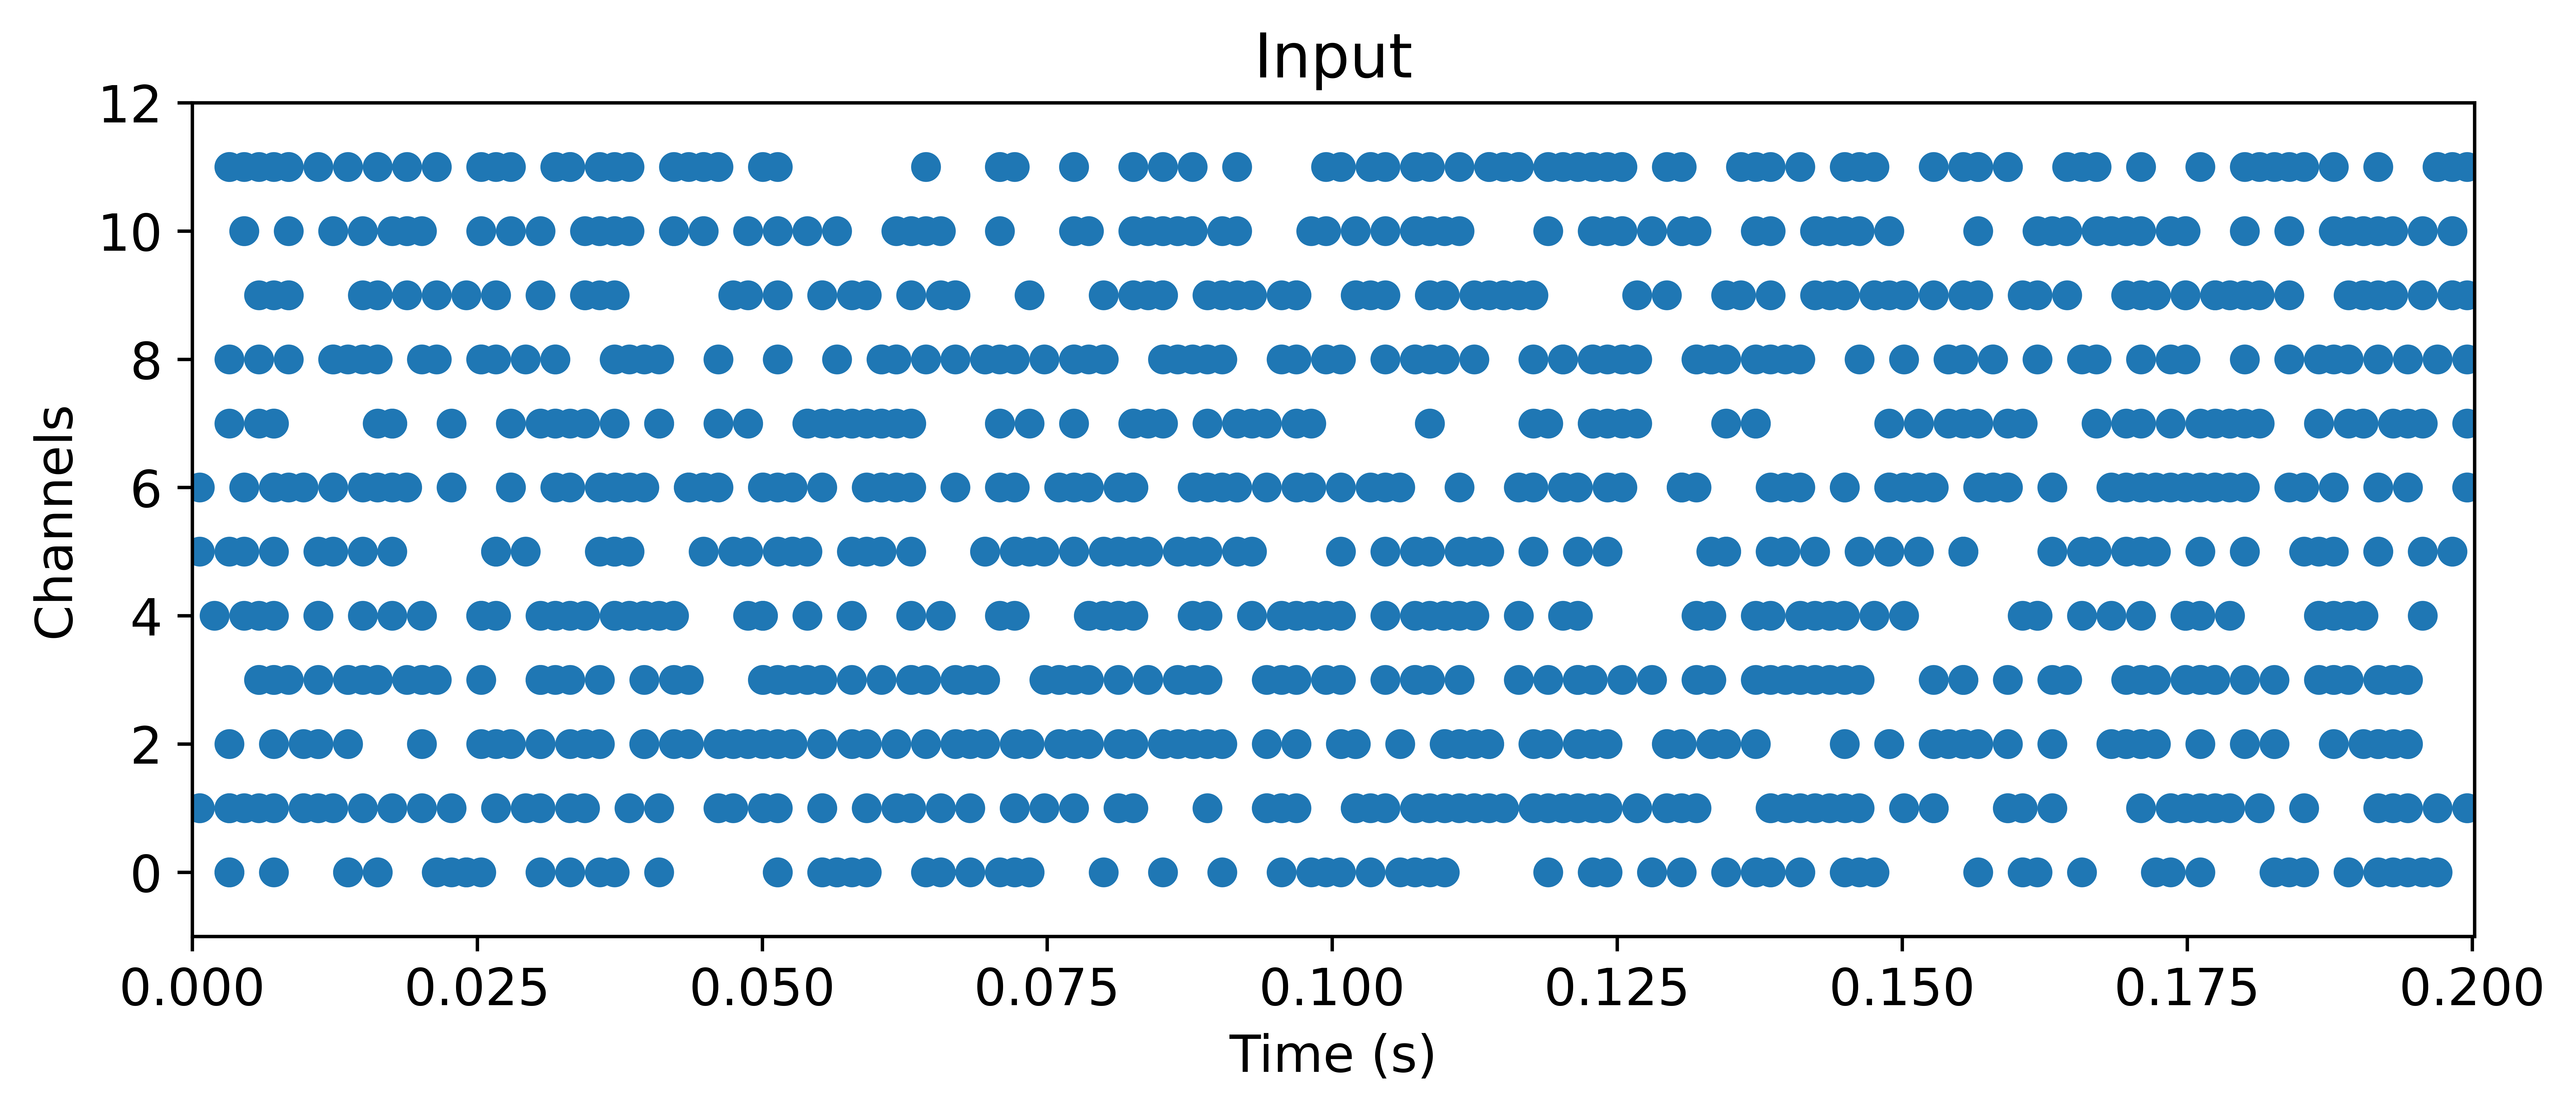

In [5]:
TSEvent.from_raster(spike_train[0].detach().numpy(), name=f"Input", dt=dt).plot()


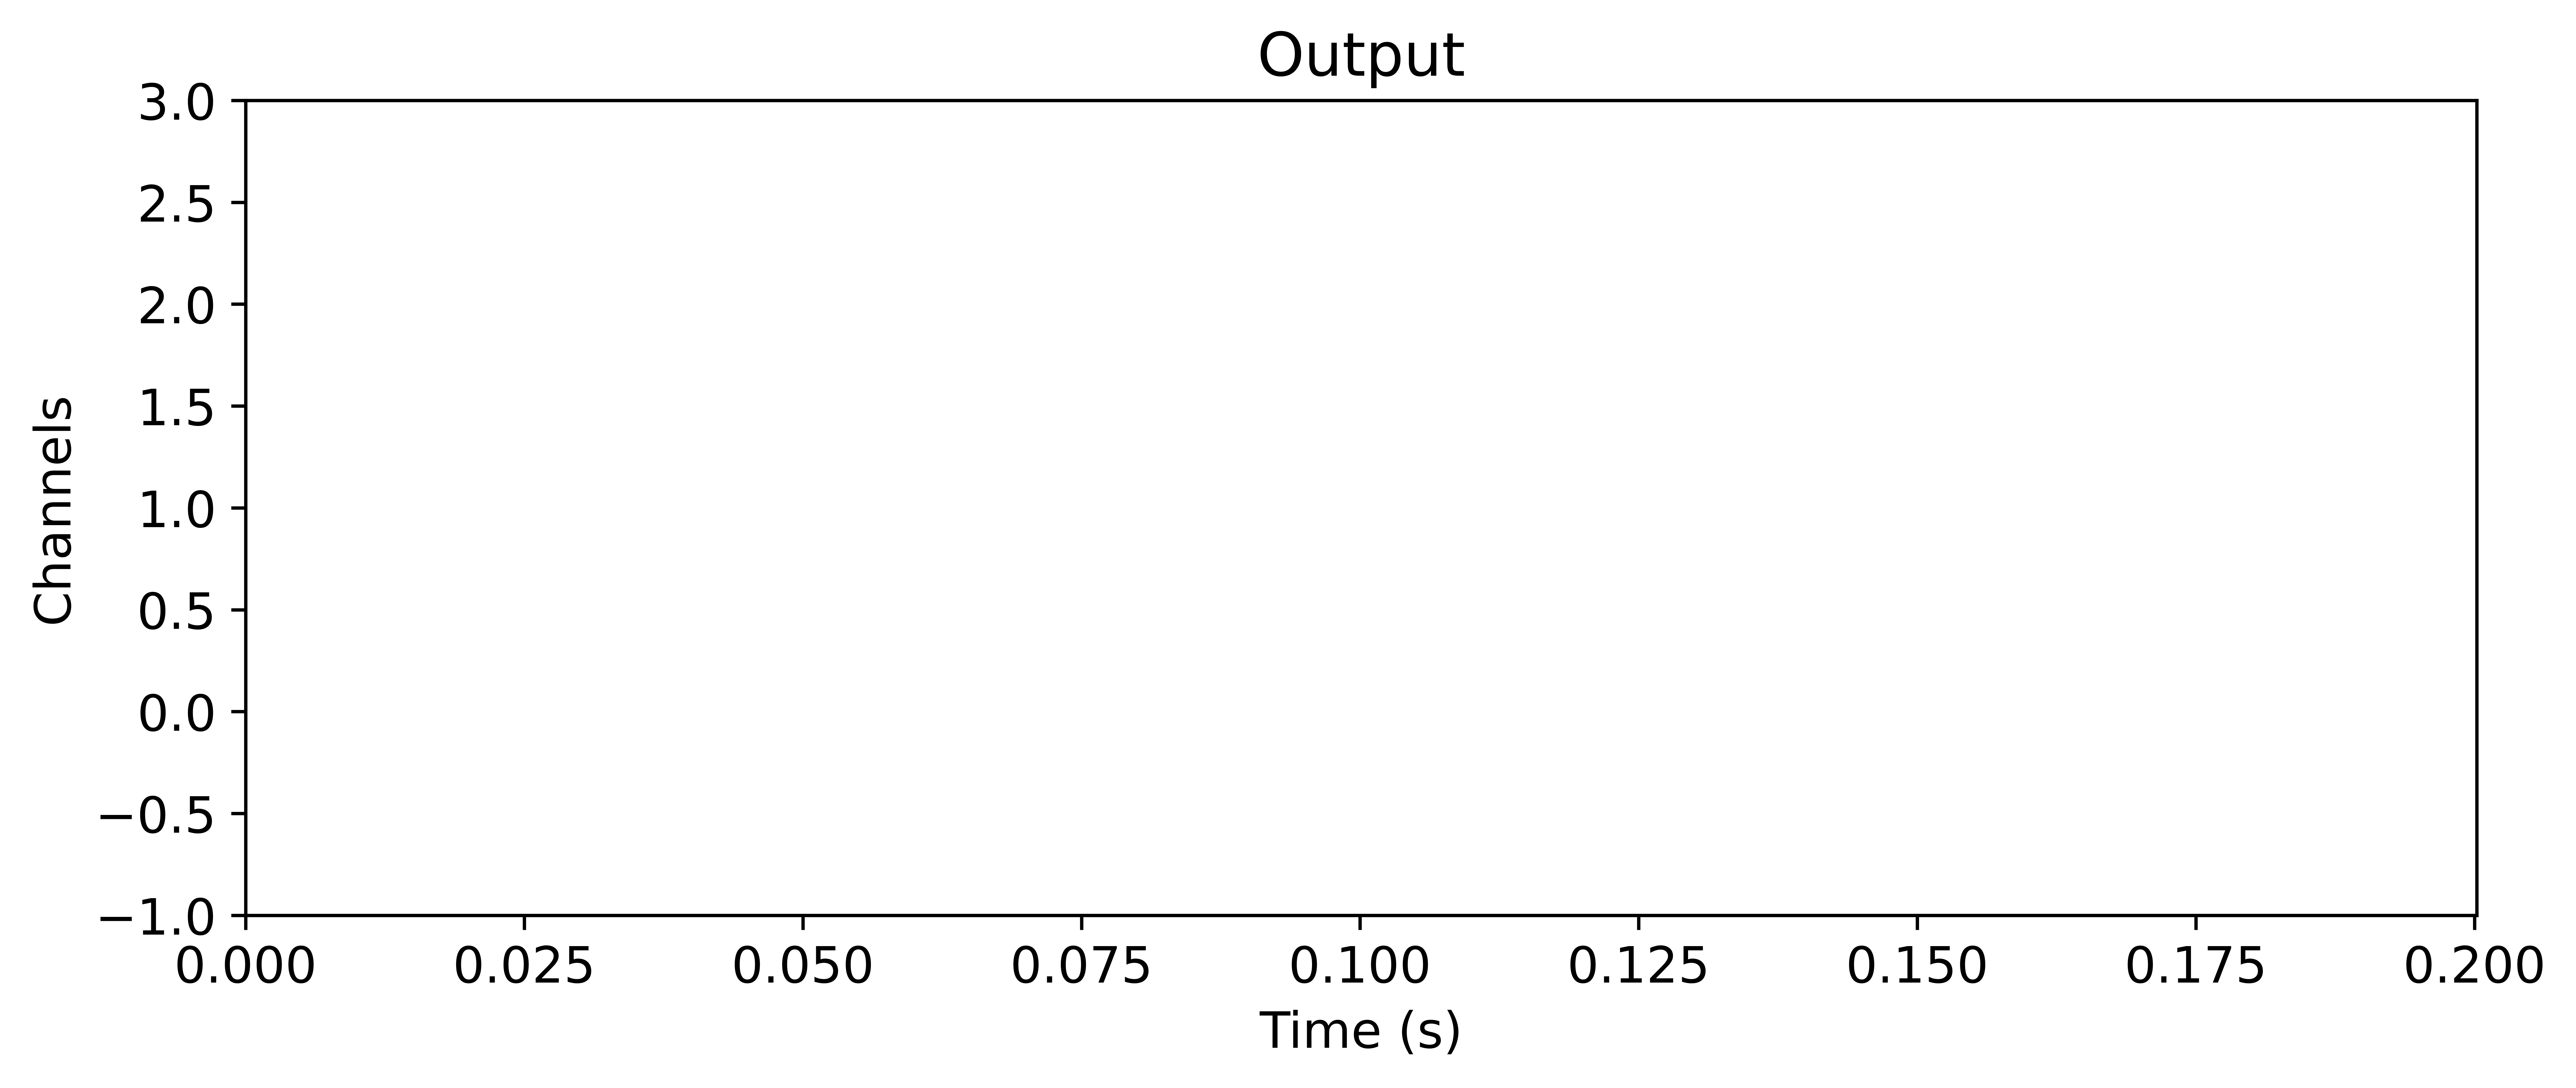

In [15]:
plt.figure()

# Run simulation
model.reset_state()
out, state, rec = model(spike_train, record=True)
TSEvent.from_raster(out[0].detach().numpy(), dt=dt, name = "Output").plot()


In [16]:
rec.keys()

dict_keys(['lin0', 'spk0', 'lin1', 'spk1', 'lin_out', 'spk_out'])

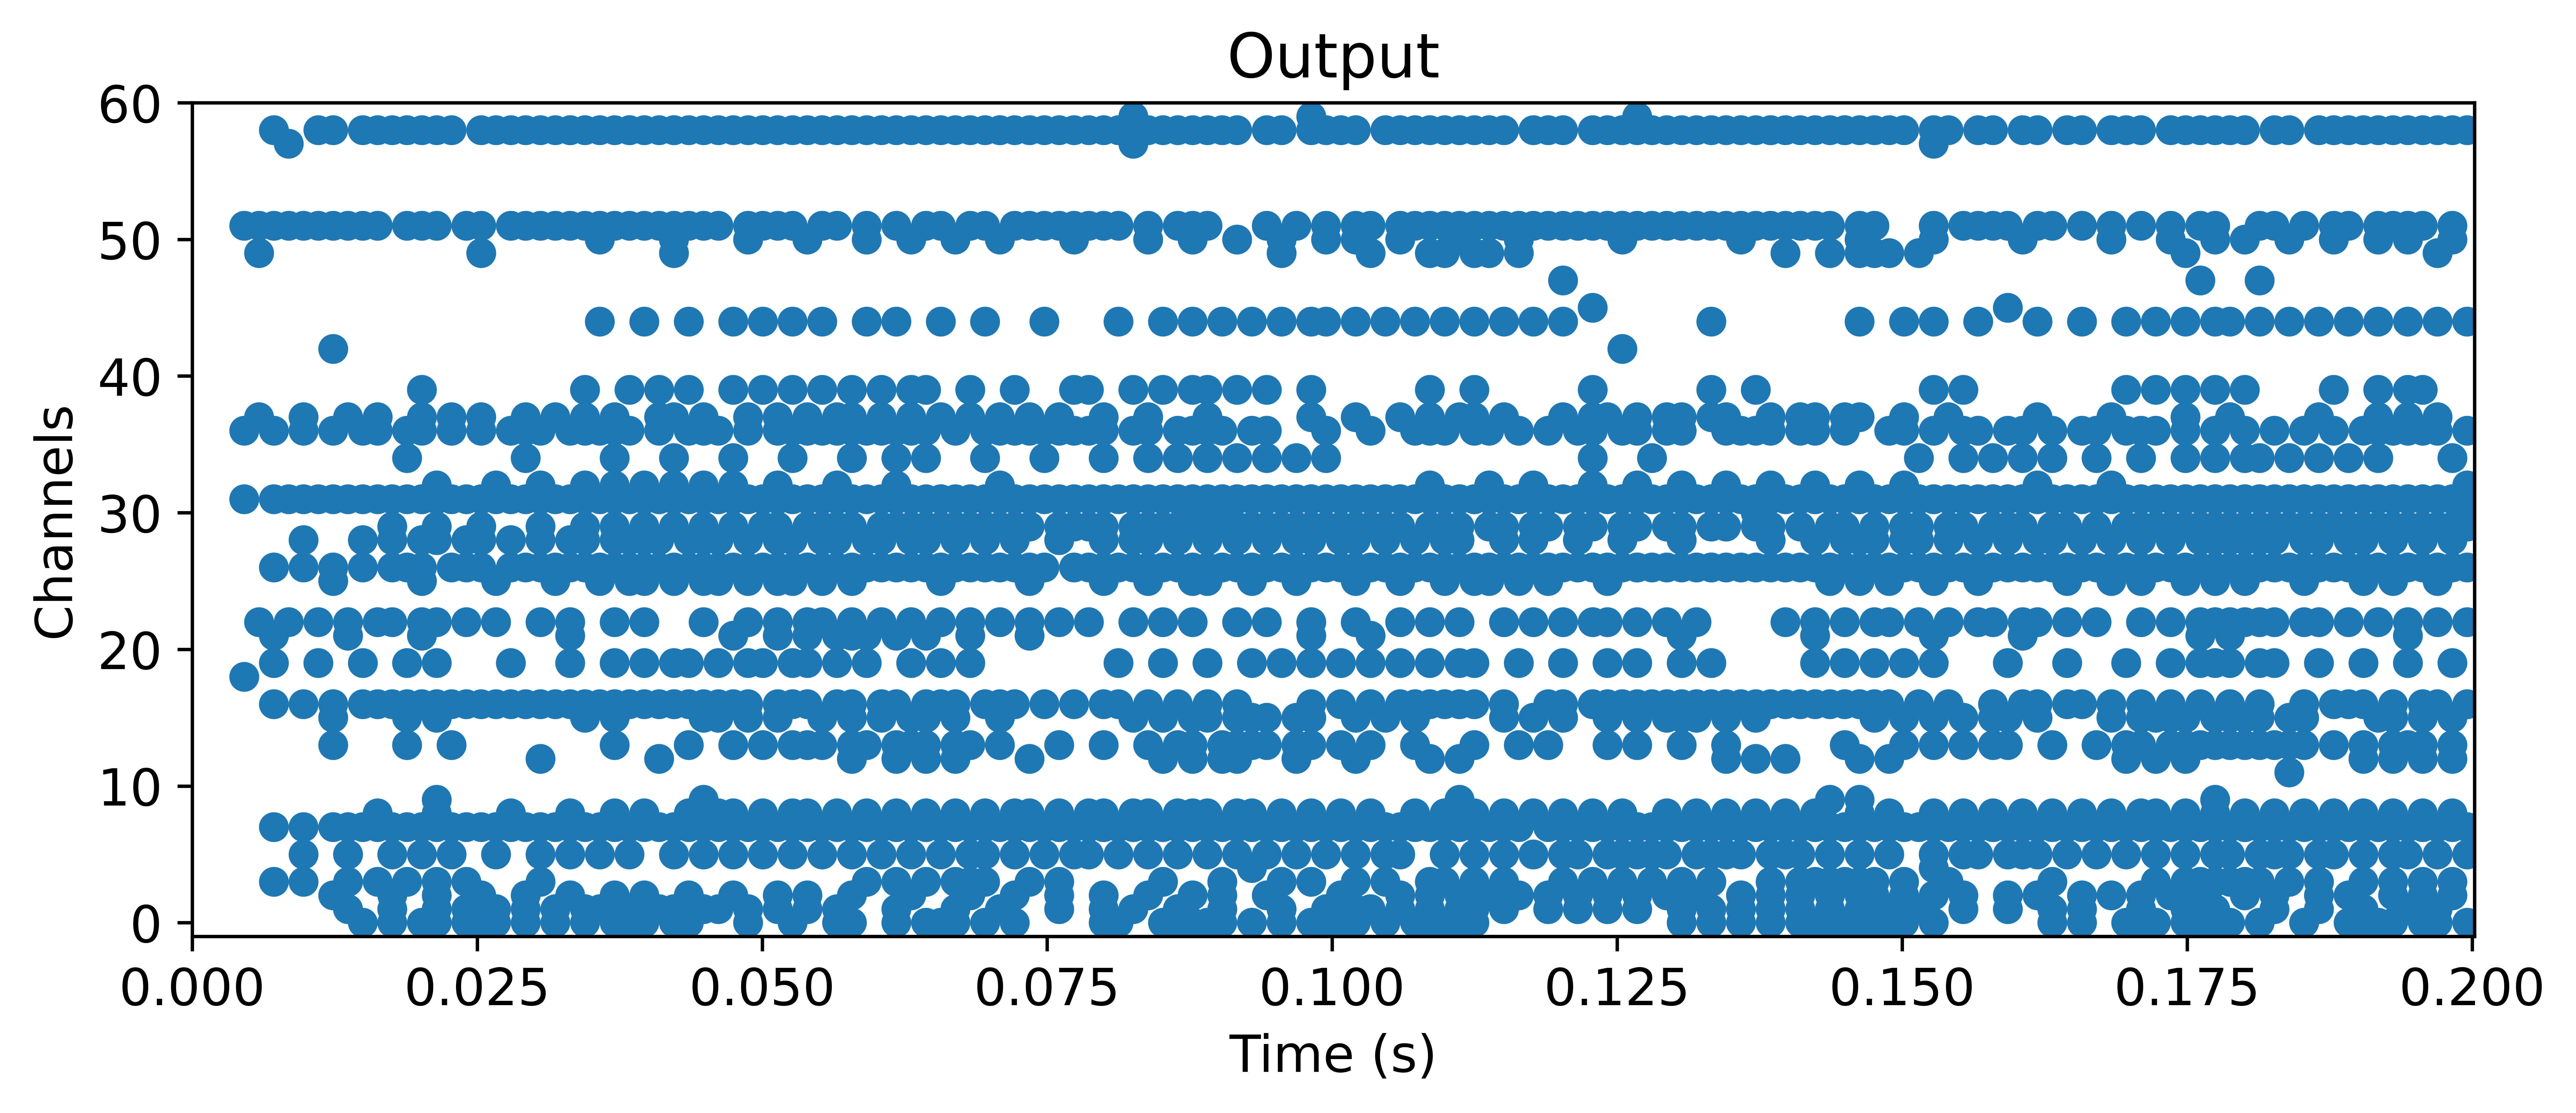

In [17]:
TSEvent.from_raster(rec["spk0"]["spikes"][0].detach().numpy(), dt=dt, name = "Output").plot()

In [18]:
rec["spk1"]

{'vmem': tensor([[[ 0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 6.0653e-02, -4.0979e-03,  9.7964e-02],
          [ 8.8897e-02, -2.2349e-02,  1.0251e-01],
          [ 1.3949e-01,  1.3365e-01,  1.5439e-01],
          [ 1.4626e-01,  3.2267e-01,  1.7824e-01],
          [ 2.8264e-01,  3.4144e-01,  2.7640e-01],
          [ 3.6395e-01,  4.0257e-01,  3.0931e-01],
          [ 3.2918e-01,  5.4917e-01,  4.2341e-01],
          [ 2.8789e-01,  6.8247e-01,  5.1588e-01],
          [ 3.1442e-01,  9.1664e-01,  6.9563e-01],
          [ 4.5364e-01,  1.0762e+00,  9.4061e-01],
          [ 4.4733e-01,  1.5118e-01,  3.8695e-02],
          [ 5.4772e-01,  6.4719e-01,  5.2682e-01],
          [ 5.1215e-01,  1.1215e+00,  9.2310e-01],
          [ 4.6907e-01,  3.2927e-01,  7.7619e-02],
          [ 5.1417e-01,  8.8222e-01,  5.7074e-01],
          [ 4.8966e-01,  2.1003e-01,  9.8563e-01],
          [ 4.0415e-01,

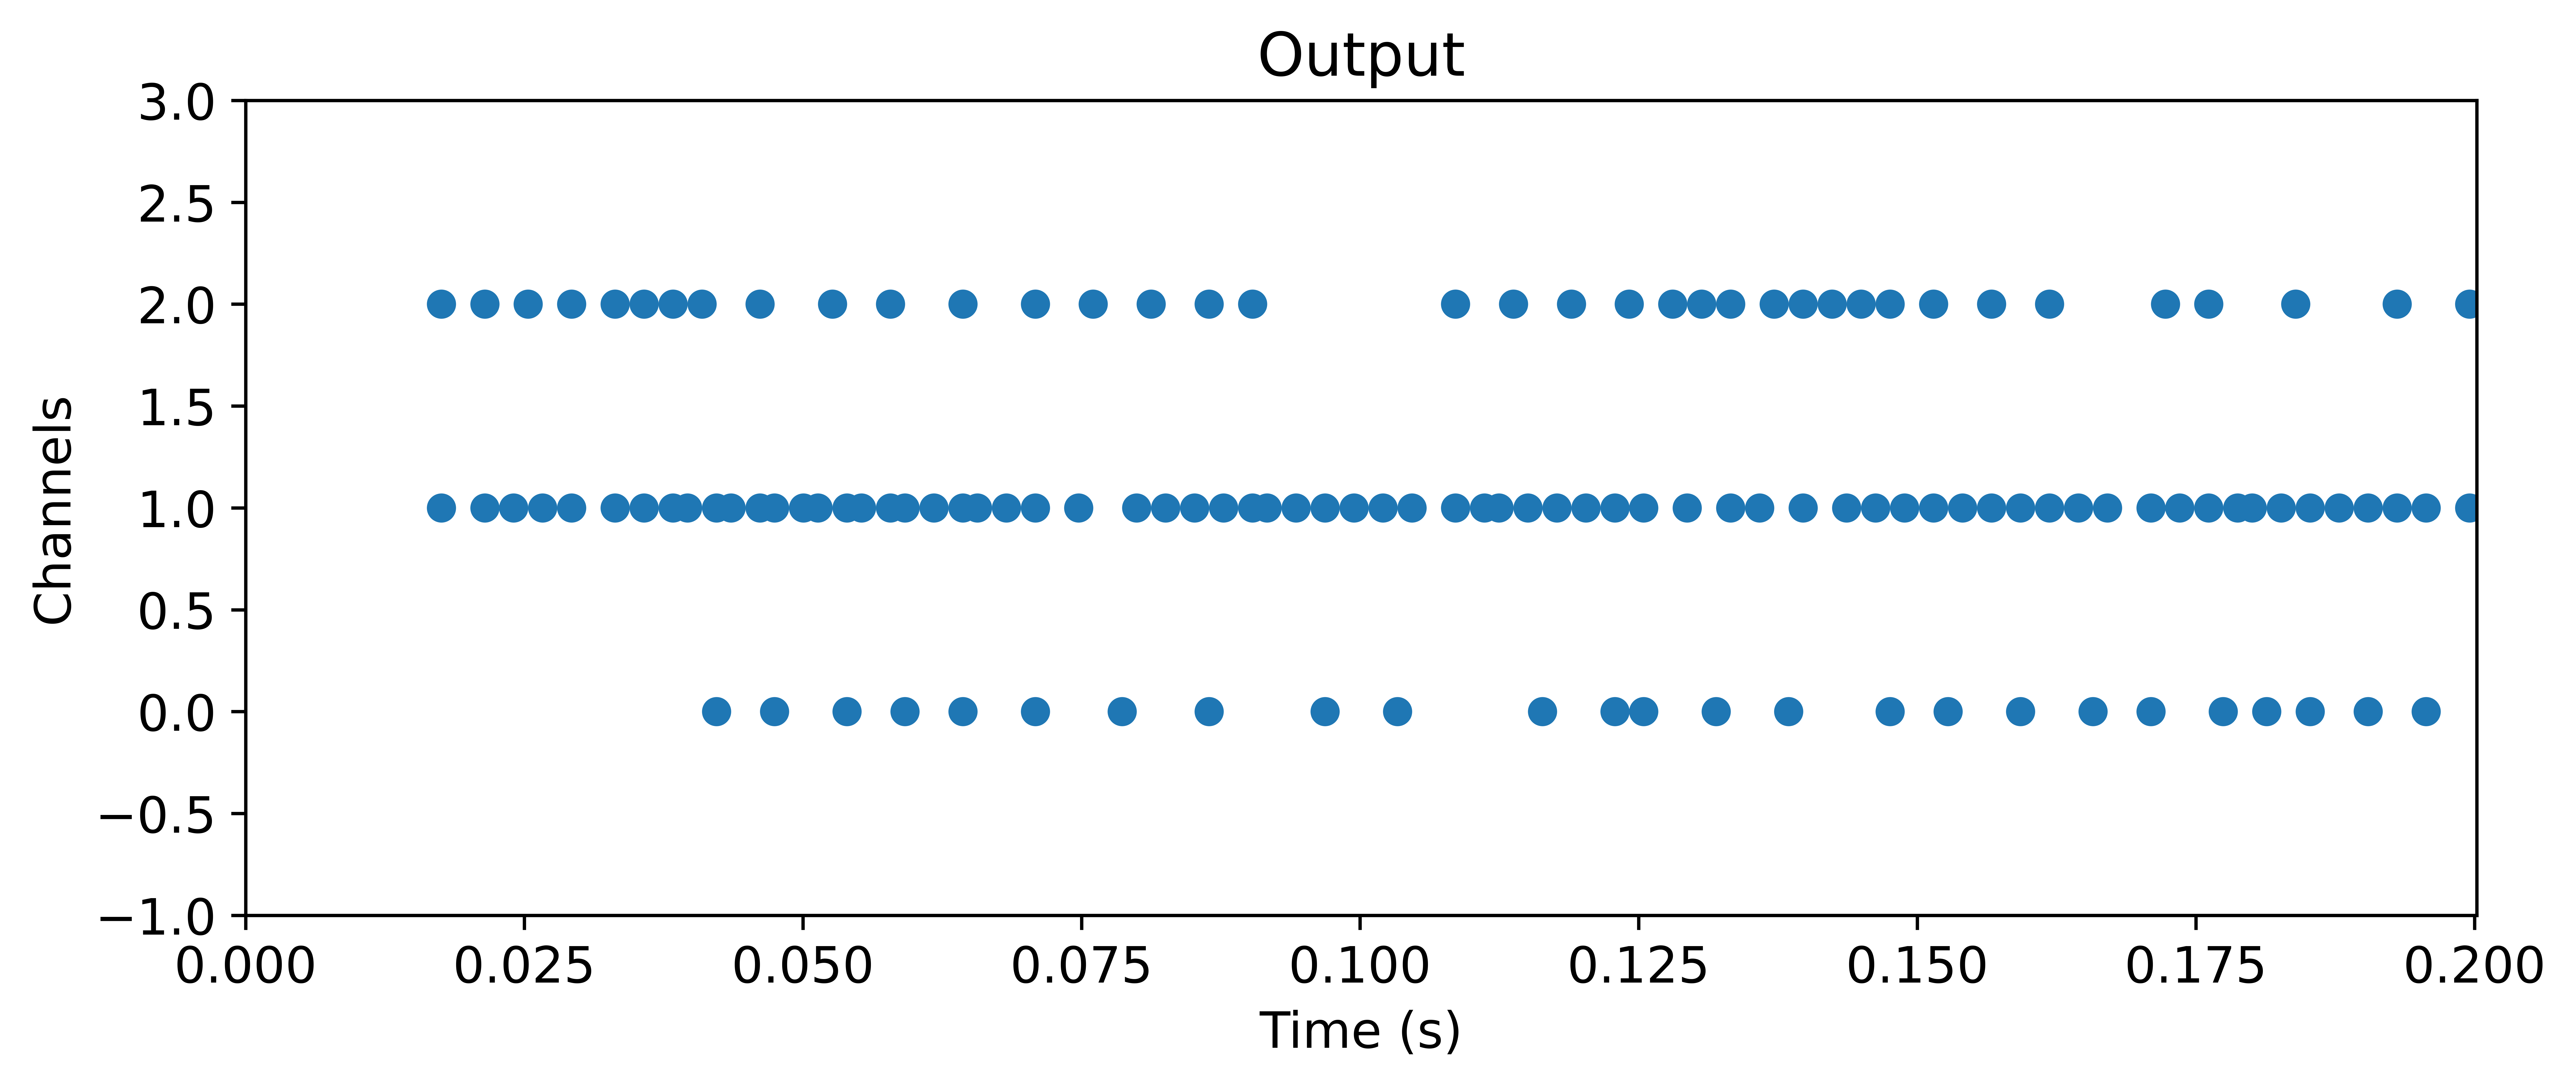

In [19]:
TSEvent.from_raster(rec["spk1"]["spikes"][0].detach().numpy(), dt=dt, name = "Output").plot()

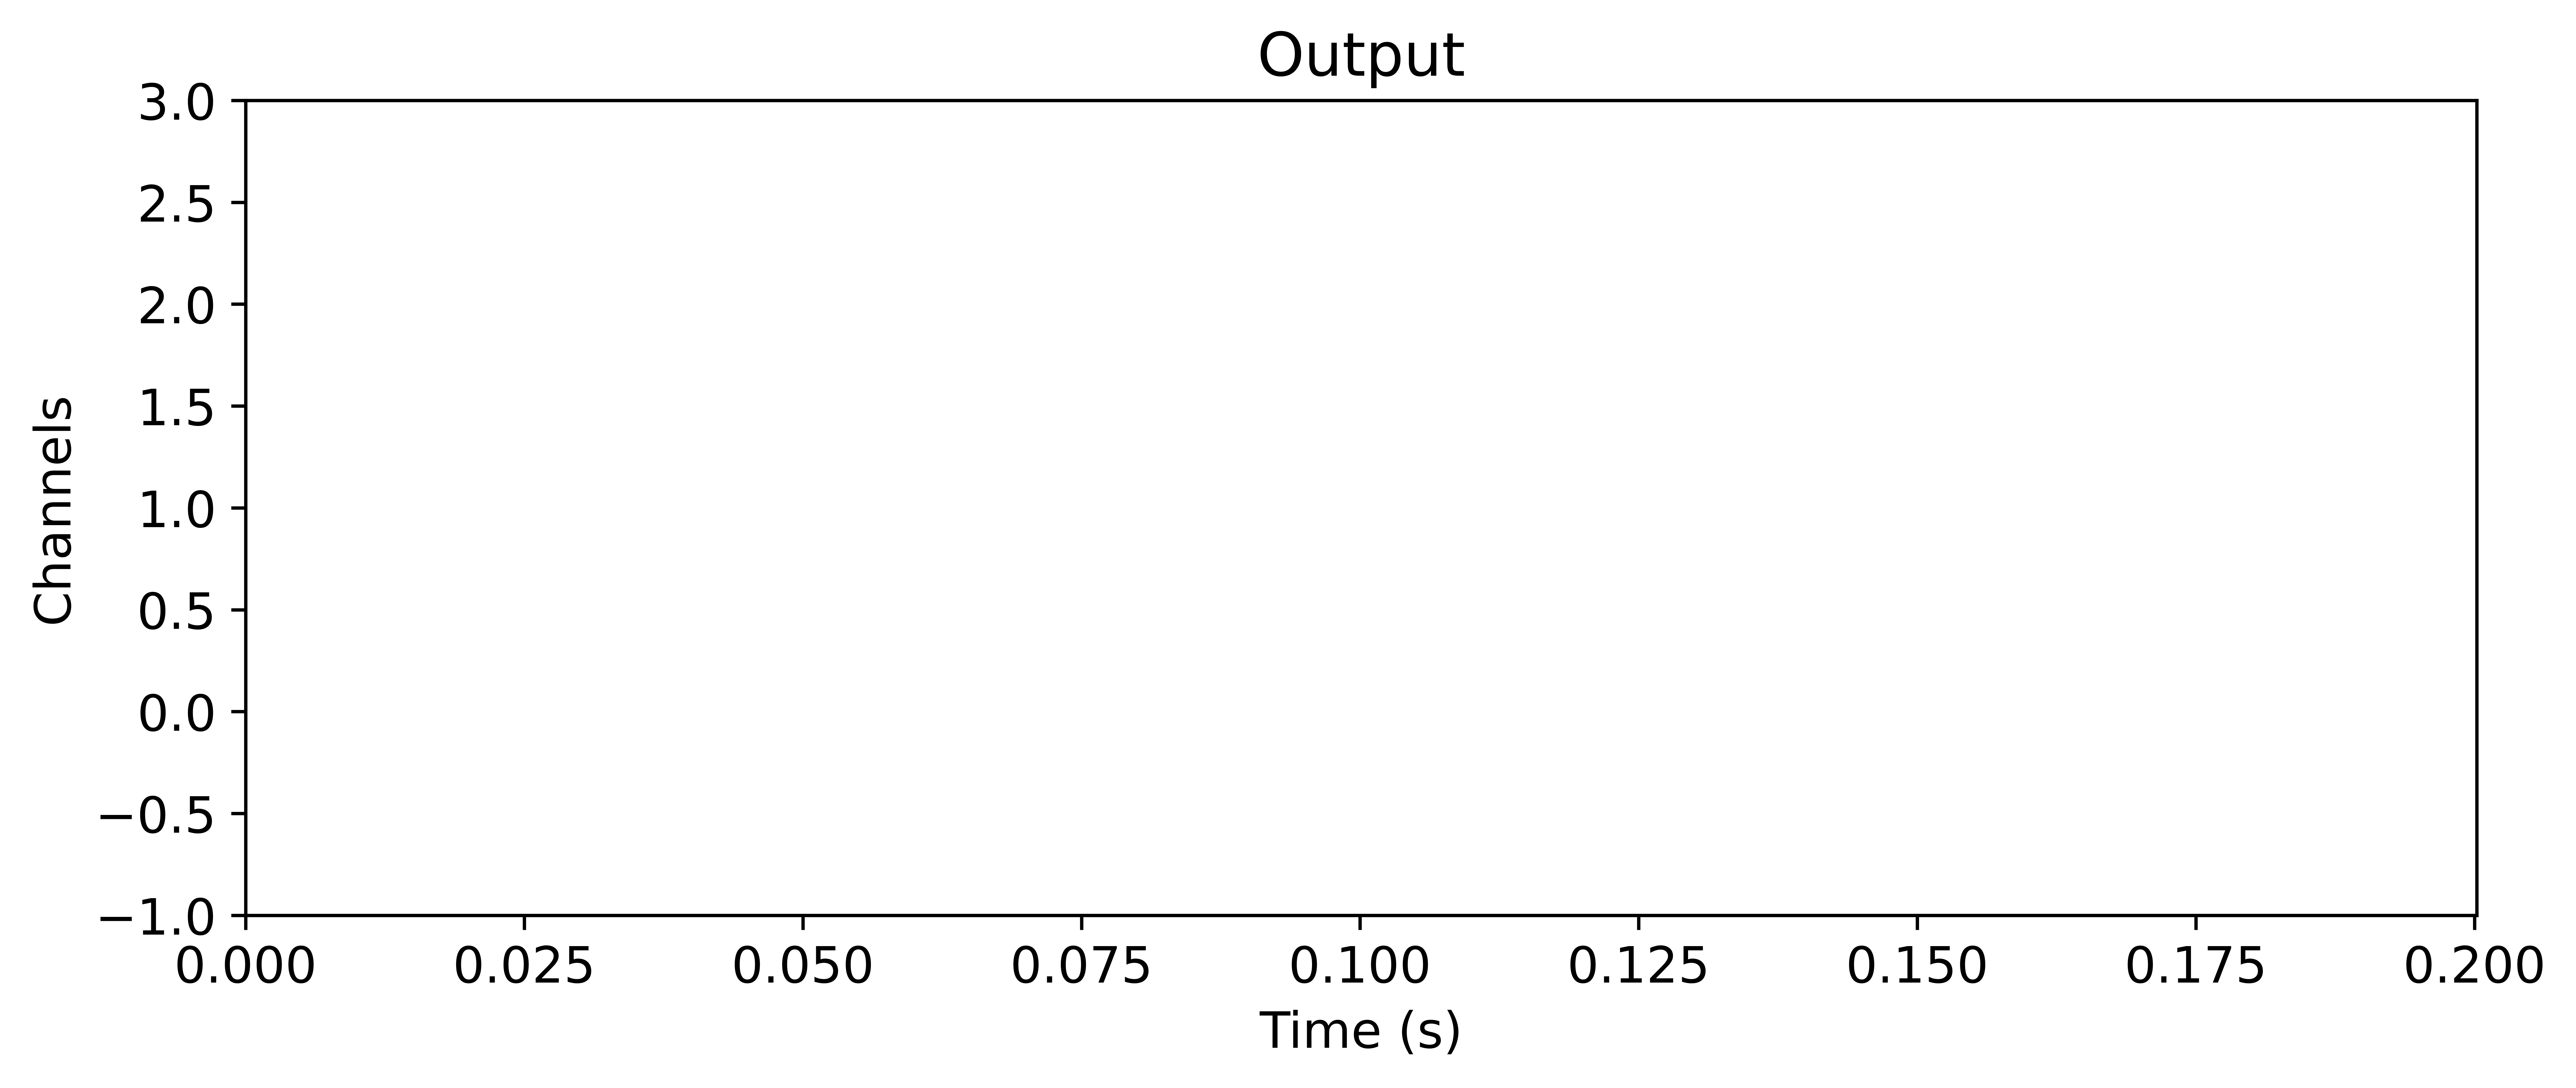

In [20]:
TSEvent.from_raster(rec["spk_out"]["spikes"][0].detach().numpy(), dt=dt, name = "Output").plot()

In [21]:
rec["spk_out"]

{'vmem': tensor([[[ 0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
          [ 6.2521e-05,  1.9580e-04,  1.3889e-04],
          [ 1.0160e-04,  3.1818e-04,  2.2569e-04],
          [ 1.2407e-04,  3.8854e-04,  2.7561e-04],
          [ 2.3400e-04,  2.2124e-04,  4.3902e-04],
          [ 2.9883e-04,  1.0454e-04,  5.3254e-04],
          [ 4.3111e-04, -1.7665e-04,  7.1653e-04],
          [ 5.6696e-04,

In [22]:
from rockpool.graph.utils import bag_graph

In [23]:
_, mods = bag_graph(model.as_graph())

In [24]:
mods

[LinearWeights "LinearTorch_'lin0'_11142882992" with 12 input nodes -> 60 output nodes,
 LIFNeuronWithSynsRealValue "LIFTorch_'spk0'_11142882128" with 60 input nodes -> 60 output nodes,
 LinearWeights "LinearTorch_'lin1'_11142886208" with 60 input nodes -> 3 output nodes,
 LIFNeuronWithSynsRealValue "LIFTorch_'spk1'_11142883040" with 3 input nodes -> 3 output nodes,
 LinearWeights "LinearTorch_'lin_out'_11142883136" with 3 input nodes -> 3 output nodes,
 LIFNeuronWithSynsRealValue "LIFTorch_'spk_out'_11142883088" with 3 input nodes -> 3 output nodes]

In [27]:
spec = mapper(model.as_graph(), in_place=True)

# The behavior of the circuit depends on the temprature. For now, just scale the Iscale parameter manually to make the network fire more or less.
# In future, we'll omit this!

# spec["Iscale"] *= 50

In [ ]:
spec

{'mapped_graph': GraphHolder "SynNet__10982450528_transformed_SE_11237641808" with 12 input nodes -> 66 output nodes,
 'weights_in': array([[-1.73837960e-01,  8.70249197e-02,  2.49889810e-02,
          1.53612971e-01,  1.67121887e-02,  5.63293649e-03,
         -4.62791808e-02, -8.35235696e-03, -1.13000702e-02,
         -1.26042187e-01,  8.11735243e-02,  3.08765788e-02,
          1.24252759e-01, -1.42033799e-02,  7.70869385e-03,
          1.86354771e-01,  4.01229784e-02, -2.73379683e-02,
          5.67870848e-02,  8.88556540e-02, -4.37470116e-02,
          1.78538829e-01,  6.67711645e-02, -4.46627587e-02,
          1.15645416e-01,  7.92123824e-02, -1.34134423e-02,
          8.47862139e-02, -2.67874021e-02,  2.17935331e-02,
         -6.80818781e-02, -8.03306103e-02, -1.42188156e-02,
          1.20497562e-01, -2.37027947e-02, -2.22360119e-02,
         -8.39312449e-02, -5.15713878e-02,  1.02895601e-02,
          8.16161409e-02,  6.51011243e-02, -4.45962213e-02,
          9.64101478e-02,  7

In [ ]:
spec.update(autoencoder_quantization(**spec))

In [ ]:
spec

{'mapped_graph': GraphHolder "SynNet__10982450528_transformed_SE_11237641808" with 12 input nodes -> 66 output nodes,
 'weights_in': [array([[15,  3,  0, 15,  0,  0,  1,  0,  0,  7,  9,  2, 11,  4,  0, 15,
           4,  0,  8,  9,  1, 15, 12,  1, 11,  6,  2,  5,  2,  2,  1, 12,
           4, 11,  8,  0,  3,  2,  0,  7,  5,  2, 13,  6,  4,  1,  0,  4,
           5,  0,  0, 15,  1,  0, 15,  1,  2,  1,  4,  0,  0,  0,  0,  0,
           0,  0],
         [15,  1,  0,  5,  5,  2, 13,  8,  4, 15,  0,  4,  4,  1,  1,  0,
           6,  4,  5,  3,  0,  4,  0,  0,  9,  6,  2, 11,  1,  2,  0,  5,
           0,  4,  1,  4, 15,  6,  2, 15, 12,  1,  9, 10,  0, 13,  0,  8,
           0, 11,  0, 15,  2,  2, 15,  9,  0, 15, 13,  1,  0,  0,  0,  0,
           0,  0],
         [15,  8,  0,  0,  2,  0, 14, 10,  0, 15,  0,  2,  7,  1,  0,  2,
           9,  2, 15, 13,  4, 15,  0,  2, 15,  1,  1,  4,  9,  0, 15, 11,
           0, 15,  8,  0,  5,  6,  2, 15,  5,  0, 12,  0,  2, 11,  4,  2,
           1, 10

In [ ]:
config = config_from_specification(**spec)


## Step 6 : Connect to Device

In [ ]:
## Connect to device
se2_devices = find_dynapse_boards()

found_se2 = len(se2_devices) > 0

if not found_se2:
    raise IOError(
        "This tutorial requires a connected Dynap-SE2 Stack Board HDK to demonstrate."
    )
else:
    se2 = DynapseSamna(se2_devices[0], **config ,dt=dt)


In [ ]:
plt.rcParams["figure.figsize"] = [9.6, 6.4]
out, state, rec = se2(spike_train[0].detach().numpy(), record=True)
visualize_device_sim(spike_train[0].detach().numpy(), out, rec, config["input_channel_map"], se2.dt);


<Figure size 11520x7680 with 0 Axes>